<a href="https://colab.research.google.com/github/EliseMcHallam/Classifying-Exoplanet-Subclasses-with-ML/blob/main/Classification_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount("/content/drive")

def try_read_any():
    path = '/content/drive/MyDrive/Exoplanets/exoplanet_outputs/data.csv'
    # Try CSV fast path
    try:
        df = pd.read_csv(path, low_memory=False)
        return df
    except Exception as e_csv:
        # Try Excel
        try:
            df = pd.read_excel(path, engine='openpyxl')
            return df
        except Exception as e_xl:
            # Try CSV with encoding guesses
            encodings = ['utf-8', 'latin-1', 'utf-16', 'cp1252']
            try:
                import chardet
                with open(path, 'rb') as f:
                    raw = f.read(1000000)
                guess = chardet.detect(raw).get('encoding')
                if guess and guess not in encodings:
                    encodings.insert(0, guess)
            except Exception:
                pass
            for enc in encodings:
                try:
                    return pd.read_csv(path, encoding=enc, low_memory=False)
                except Exception:
                    continue
            raise RuntimeError(f'Failed to read file. CSV error: {e_csv}; Excel error: {e_xl}')

# Now just call it directly
df = try_read_any()

print('Loaded shape:', df.shape)
display(df.head(3))


Mounted at /content/drive
Loaded shape: (34892, 28)


,loc_rowid,pl_name,hostname,pl_controv_flag,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,...,st_logg,rastr,ra,decstr,dec,sy_dist,sy_vmag,sy_kmag,sy_gaiamag,rowupdate
0,1,11 Com b,11 Com,0,NaN,1.21,NaN,NaN,5434.7,17.1,...,NaN,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,4.72307,2.282,4.44038,2014-07-23
1,2,11 Com b,11 Com,0,326.03,1.29,NaN,NaN,6165.6,19.4,...,2.31,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,4.72307,2.282,4.44038,2014-05-14
2,3,11 UMi b,11 UMi,0,NaN,1.51,NaN,NaN,3432.4,10.8,...,NaN,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.3210,5.01300,1.939,4.56216,2018-04-25


In [2]:

from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount("/content/drive")

def try_read_any():
    path = '/content/drive/MyDrive/Exoplanets/exoplanet_outputs/data.csv'
    # Try CSV fast path
    try:
        df = pd.read_csv(path, low_memory=False)
        return df
    except Exception as e_csv:
        # Try Excel
        try:
            df = pd.read_excel(path, engine='openpyxl')
            return df
        except Exception as e_xl:
            # Try CSV with encoding guesses
            encodings = ['utf-8', 'latin-1', 'utf-16', 'cp1252']
            try:
                import chardet
                with open(path, 'rb') as f:
                    raw = f.read(1000000)
                guess = chardet.detect(raw).get('encoding')
                if guess and guess not in encodings:
                    encodings.insert(0, guess)
            except Exception:
                pass
            for enc in encodings:
                try:
                    return pd.read_csv(path, encoding=enc, low_memory=False)
                except Exception:
                    continue
            raise RuntimeError(f'Failed to read file. CSV error: {e_csv}; Excel error: {e_xl}')

# Now just call it directly
df = try_read_any()

print('Loaded shape:', df.shape)
display(df.head(3))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded shape: (34892, 28)


,loc_rowid,pl_name,hostname,pl_controv_flag,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,...,st_logg,rastr,ra,decstr,dec,sy_dist,sy_vmag,sy_kmag,sy_gaiamag,rowupdate
0,1,11 Com b,11 Com,0,NaN,1.21,NaN,NaN,5434.7,17.1,...,NaN,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,4.72307,2.282,4.44038,2014-07-23
1,2,11 Com b,11 Com,0,326.03,1.29,NaN,NaN,6165.6,19.4,...,2.31,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,4.72307,2.282,4.44038,2014-05-14
2,3,11 UMi b,11 UMi,0,NaN,1.51,NaN,NaN,3432.4,10.8,...,NaN,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.3210,5.01300,1.939,4.56216,2018-04-25


In [3]:

def schema_summary(df):
    rows = []
    for c in df.columns:
        s = df[c]
        rows.append({
            'column': c,
            'dtype': str(s.dtype),
            'non_null': int(s.notna().sum()),
            'n_unique': int(s.nunique(dropna=True)),
            'sample_values': s.dropna().astype(str).head(3).tolist()
        })
    return pd.DataFrame(rows)

schema = schema_summary(df)
display(schema.head(20))
print('Total rows:', len(df), 'Total cols:', df.shape[1])

missing = df.isna().mean().sort_values(ascending=False)
display(missing.head(15).to_frame('missing_frac'))


,column,dtype,non_null,n_unique,sample_values
0,loc_rowid,int64,34892,34892,"[1, 2, 3]"
1,pl_name,object,34892,5463,"[11 Com b, 11 Com b, 11 UMi b]"
2,hostname,object,34892,4072,"[11 Com, 11 Com, 11 UMi]"
3,pl_controv_flag,int64,34892,2,"[0, 0, 0]"
4,pl_orbper,float64,31838,20615,"[326.03, 516.21997, 516.22]"
5,pl_orbsmax,float64,19275,4743,"[1.21, 1.29, 1.51]"
6,pl_rade,float64,24042,4279,"[18.647, 11.209, 16.141]"
7,pl_radj,float64,10909,1448,"[1.664, 1.0, 1.44]"
8,pl_bmasse,float64,5493,3577,"[5434.7, 6165.6, 3432.4]"
9,pl_bmassj,float64,5492,2644,"[17.1, 19.4, 10.8]"


Total rows: 34892 Total cols: 28


,missing_frac
st_spectype,0.938869
pl_bmassj,0.842600
pl_bmassprov,0.842571
pl_bmasse,0.842571
pl_radj,0.687350
pl_orbeccen,0.498624
pl_orbsmax,0.447581
st_metratio,0.375845
st_met,0.370429
pl_rade,0.310960


In [4]:
from pathlib import Path

OUT_DIR = Path("/content/drive/MyDrive/Exoplanets/exoplanet_outputs")

CLEAN_PATH = OUT_DIR / "cleaned_dataset.csv"
df.to_csv(CLEAN_PATH, index=False)
print("Saved cleaned dataset to", CLEAN_PATH)

# Load it back
data_cleaned = pd.read_csv(CLEAN_PATH)
print("Loaded cleaned dataset shape:", data_cleaned.shape)
display(data_cleaned.head(3))


Saved cleaned dataset to /content/drive/MyDrive/Exoplanets/exoplanet_outputs/cleaned_dataset.csv
Loaded cleaned dataset shape: (34892, 28)


,loc_rowid,pl_name,hostname,pl_controv_flag,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,...,st_logg,rastr,ra,decstr,dec,sy_dist,sy_vmag,sy_kmag,sy_gaiamag,rowupdate
0,1,11 Com b,11 Com,0,NaN,1.21,NaN,NaN,5434.7,17.1,...,NaN,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,4.72307,2.282,4.44038,2014-07-23
1,2,11 Com b,11 Com,0,326.03,1.29,NaN,NaN,6165.6,19.4,...,2.31,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,4.72307,2.282,4.44038,2014-05-14
2,3,11 UMi b,11 UMi,0,NaN,1.51,NaN,NaN,3432.4,10.8,...,NaN,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.3210,5.01300,1.939,4.56216,2018-04-25


In [5]:
data_cleaned.head()

,loc_rowid,pl_name,hostname,pl_controv_flag,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,...,st_logg,rastr,ra,decstr,dec,sy_dist,sy_vmag,sy_kmag,sy_gaiamag,rowupdate
0,1,11 Com b,11 Com,0,NaN,1.21,NaN,NaN,5434.7000,17.10,...,NaN,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,4.72307,2.282,4.44038,2014-07-23
1,2,11 Com b,11 Com,0,326.03000,1.29,NaN,NaN,6165.6000,19.40,...,2.31,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,4.72307,2.282,4.44038,2014-05-14
2,3,11 UMi b,11 UMi,0,NaN,1.51,NaN,NaN,3432.4000,10.80,...,NaN,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.3210,5.01300,1.939,4.56216,2018-04-25
3,4,11 UMi b,11 UMi,0,516.21997,1.53,NaN,NaN,4684.8142,14.74,...,1.93,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.3210,5.01300,1.939,4.56216,2018-09-04
4,5,11 UMi b,11 UMi,0,516.22000,1.54,NaN,NaN,3337.0700,10.50,...,1.60,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.3210,5.01300,1.939,4.56216,2018-04-25


(array([2.4029e+04, 0.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00, 1.0000e+00]),
 array([2.700000e-01, 4.285410e+02, 8.568120e+02, 1.285083e+03,
        1.713354e+03, 2.141625e+03, 2.569896e+03, 2.998167e+03,
        3.426438e+03, 3.854709e+03, 4.282980e+03]),
 <BarContainer object of 10 artists>)

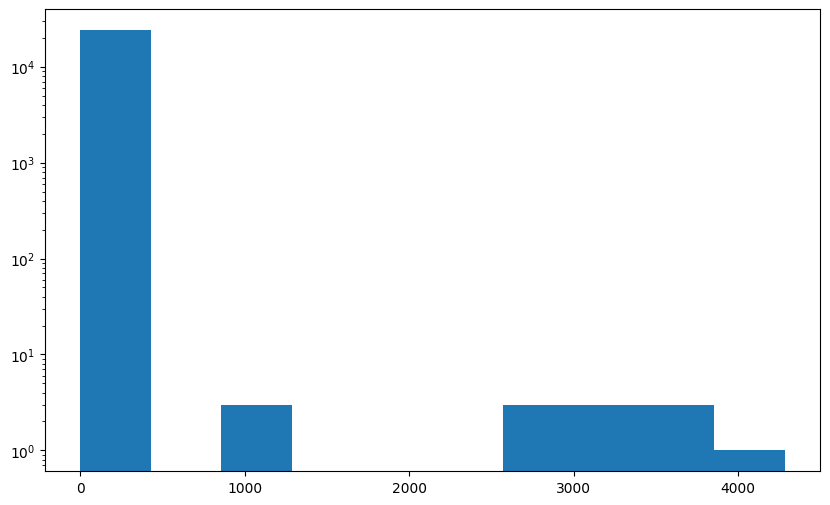

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.yscale('log')
plt.hist(data_cleaned['pl_rade'])

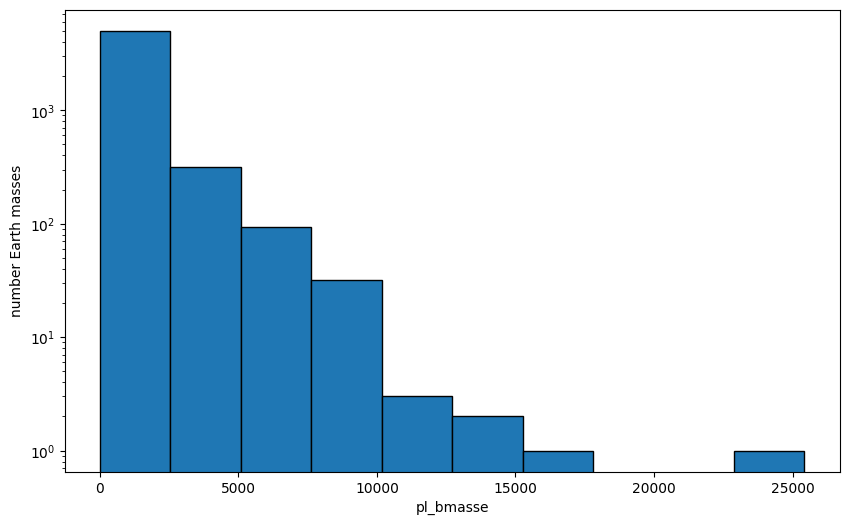

In [28]:
import matplotlib.pyplot as plt
#y axis in number of exoplanets
plt.figure(figsize=(10,6))
plt.yscale('log')
plt.hist(data_cleaned['pl_bmasse'], edgecolor = 'black')
plt.xlabel('pl_bmasse')
plt.ylabel('number Earth masses')
plt.show()

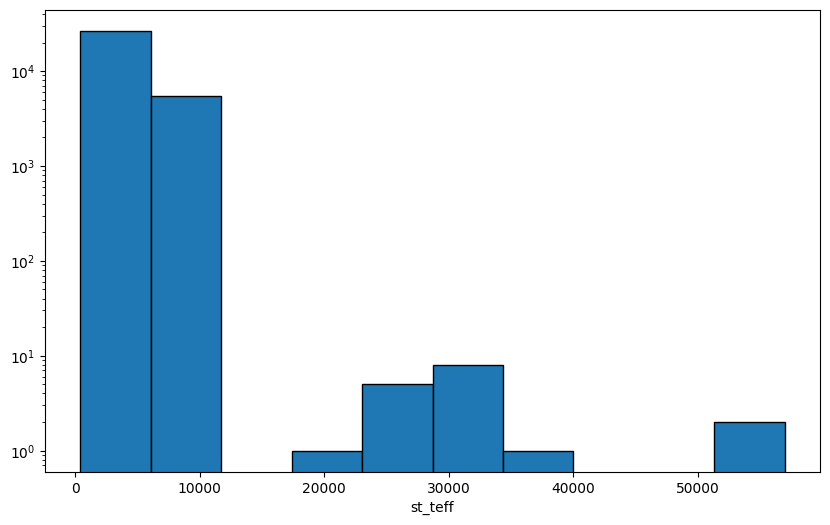

In [ ]:
plt.figure(figsize=(10,6))
plt.yscale('log')
plt.hist(data_cleaned['st_teff'], edgecolor = 'black')
plt.xlabel('st_teff')
plt.show()

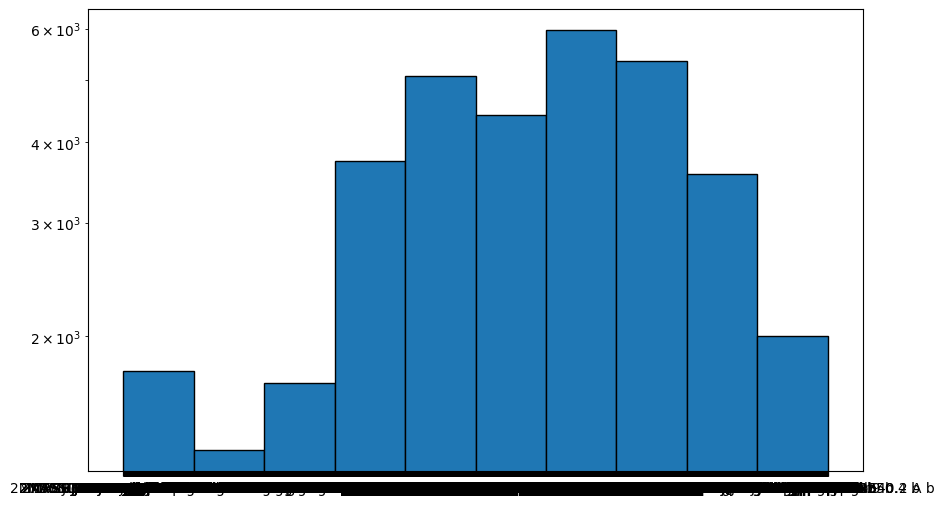

In [ ]:
plt.figure(figsize=(10,6))
plt.yscale('log')
plt.hist(data_cleaned['pl_name'], edgecolor = 'black')
plt.show()

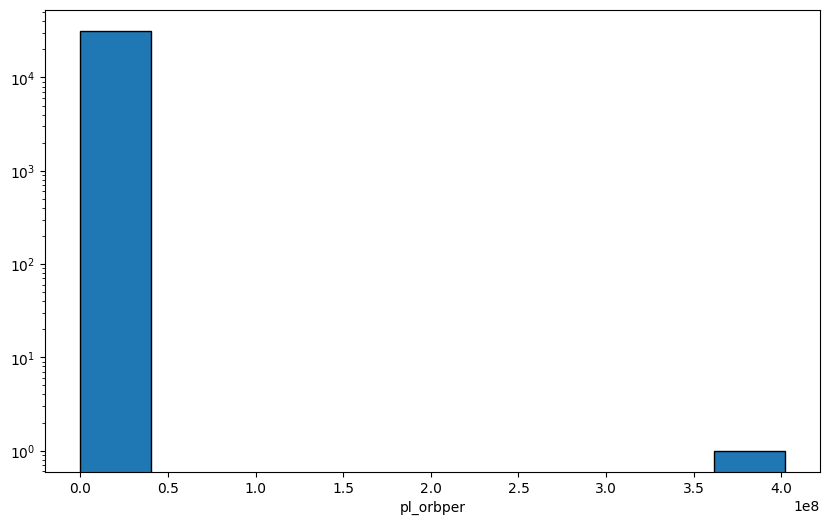

In [ ]:
plt.figure(figsize=(10,6))
plt.yscale('log')
plt.hist(data_cleaned['pl_orbper'], edgecolor = 'black')
plt.xlabel('pl_orbper')
plt.show()

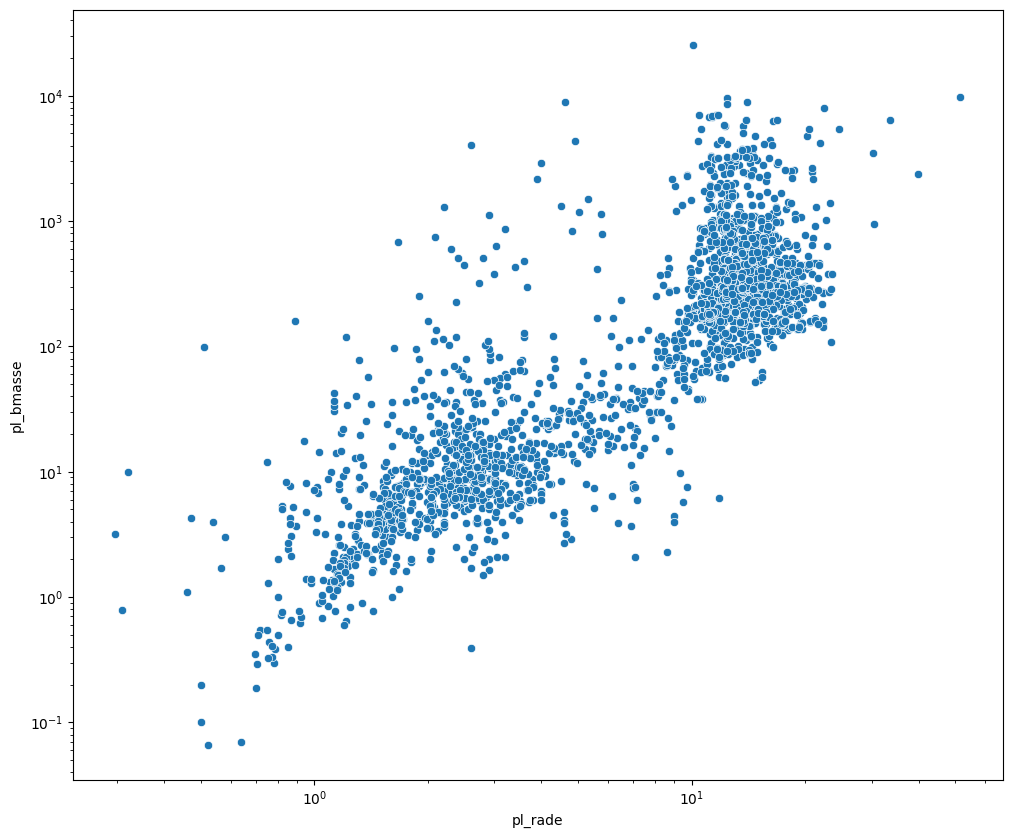

In [ ]:
plt.figure(figsize=(12,10))
plt.yscale('log')
plt.xscale('log')
sns.scatterplot(data=data_cleaned, x ='pl_rade' , y  = 'pl_bmasse')
plt.show()

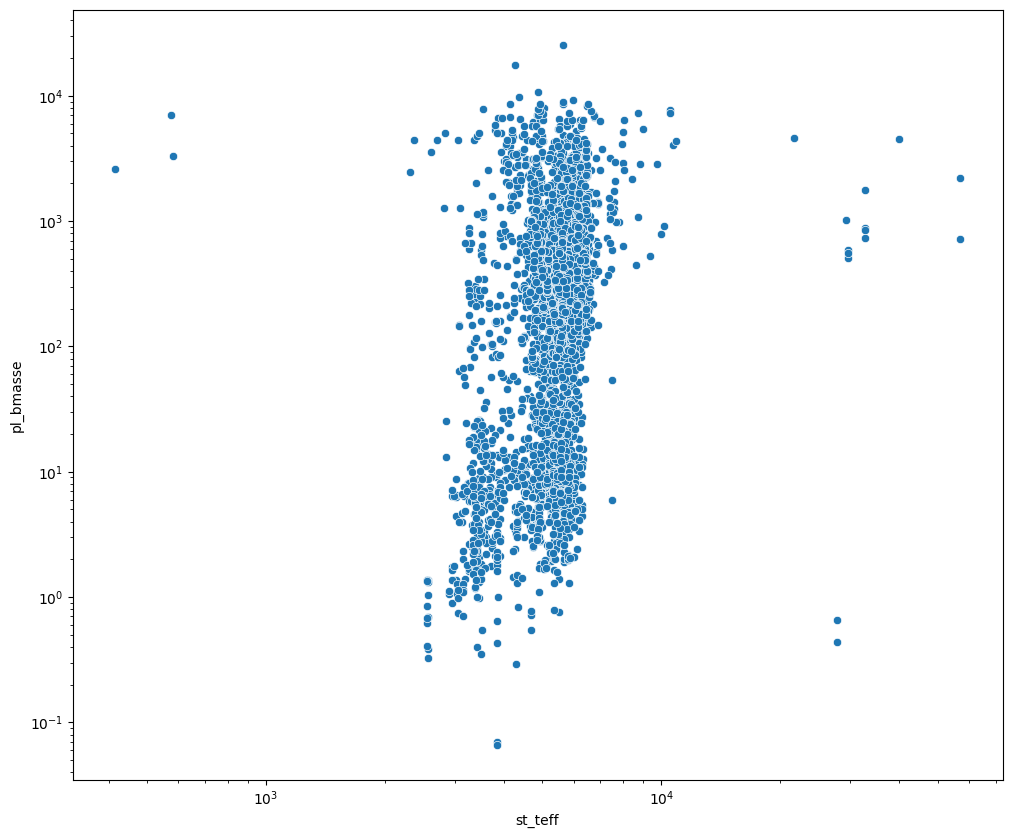

In [ ]:
plt.figure(figsize=(12,10))
plt.yscale('log')
plt.xscale('log')
sns.scatterplot(data=data_cleaned, x ='st_teff' , y  = 'pl_bmasse')
plt.show()

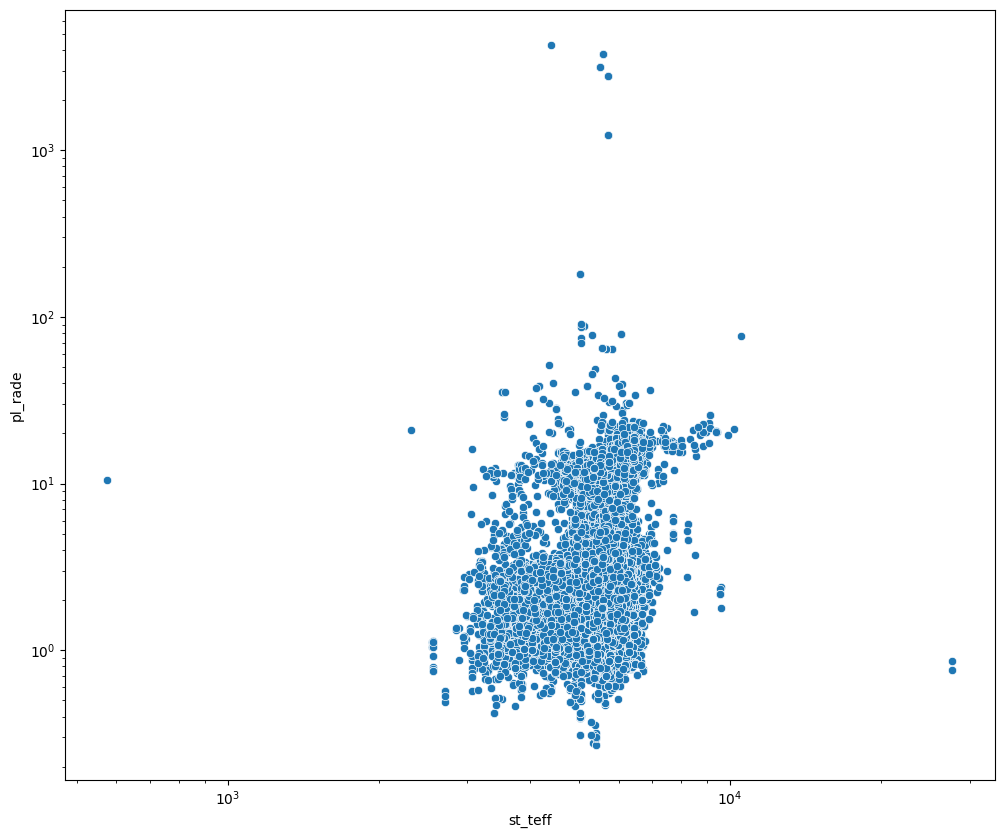

In [ ]:
plt.figure(figsize=(12,10))
plt.yscale("log")
plt.xscale("log")
sns.scatterplot(data=data_cleaned, x ='st_teff' , y  = 'pl_rade')
plt.show()

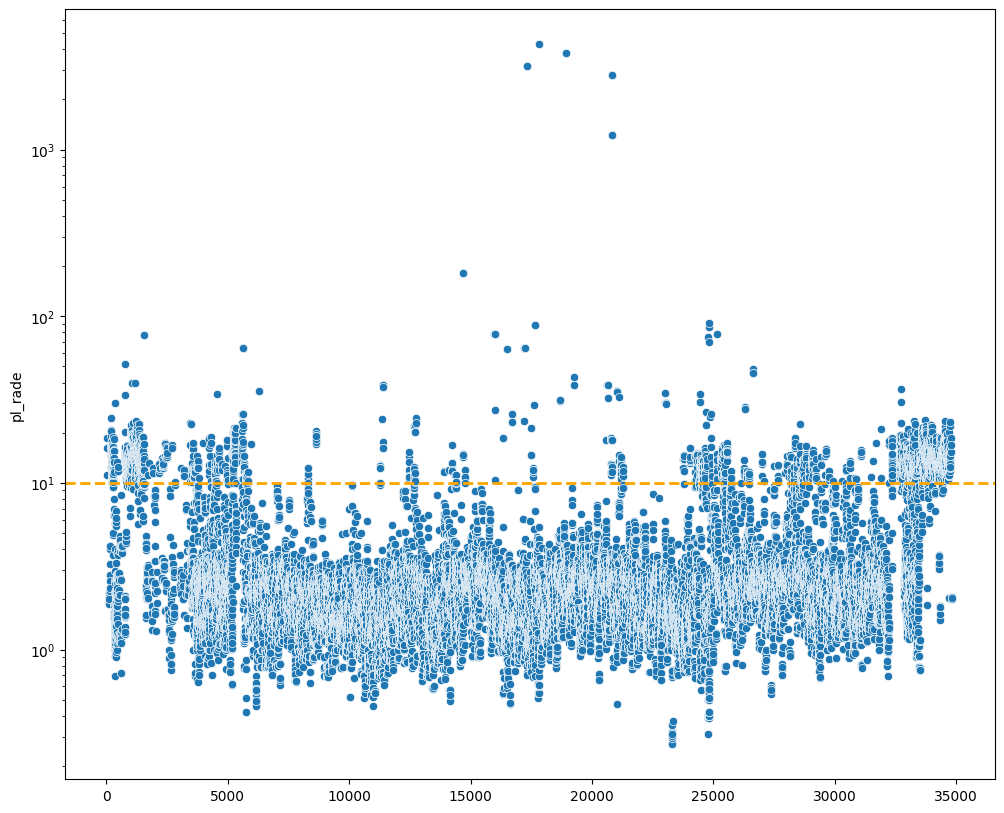

In [ ]:
plt.figure(figsize=(12,10))
plt.yscale('log')
sns.scatterplot(data=data_cleaned['pl_rade'])
plt.axhline(y=10, color='orange', linestyle = '--', linewidth=2)
plt.show()

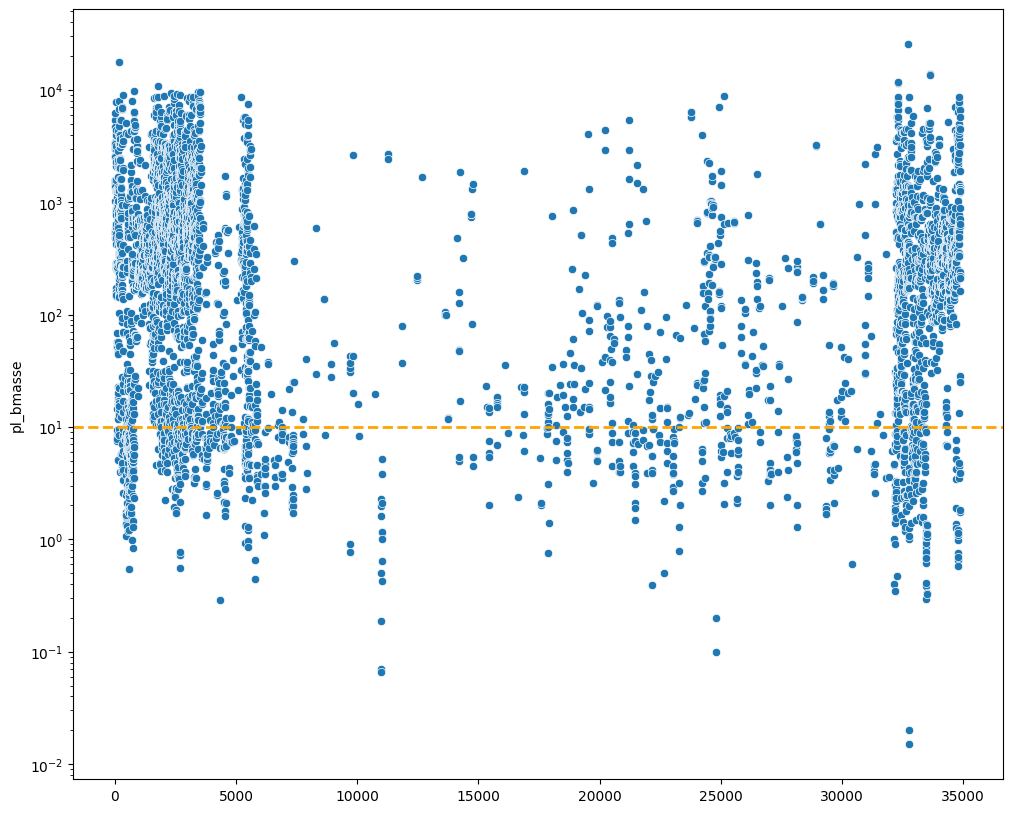

In [ ]:
plt.figure(figsize=(12,10))
plt.yscale('log')
sns.scatterplot(data=data_cleaned['pl_bmasse'], ['pl_rade'])
plt.axhline(y=10, color='orange', linestyle = '--', linewidth=2)
plt.show()

In [7]:
# ==== CELL 1: LOAD + LABELS (UNIT-CORRECT) ====

import pandas as pd
import numpy as np

# --- Load once (no duplicate mounts/reads) ---
# If you're in Colab and already mounted, this path works:
path = '/content/drive/MyDrive/Exoplanets/exoplanet_outputs/data.csv'
df = pd.read_csv(path, low_memory=False)
print("Loaded shape:", df.shape)

# --- Minimal column sanity ---
needed = ['pl_bmasse','pl_rade','pl_orbper','st_teff']
missing_cols = [c for c in needed if c not in df.columns]
if missing_cols:
    raise ValueError(f"Missing columns: {missing_cols}")

# Ensure numeric (coerce any stray strings)
for c in needed:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# --- Correct label definition ---
# pl_bmasse is in Earth masses (M_earth = 1.0). Use a reasonable cut:
# e.g., "gas giant" if mass >= 50 Earth masses OR radius >= 3 Earth radii.
df['gas_giant'] = (
    (df['pl_bmasse'] >= 50) |
    (df['pl_rade']   >= 3.0)
).astype(int)

print("Label counts:", df['gas_giant'].value_counts().to_dict())
print("Prevalence (class=1):", float(df['gas_giant'].mean()))

# --- Build modeling frame and split ---
feats = ['pl_bmasse','pl_rade','pl_orbper','st_teff']
dfm = df[feats + ['gas_giant']].dropna().copy()

# Add two signal-boosting transforms
dfm['log1p_pl_bmasse'] = np.log1p(dfm['pl_bmasse'])
dfm['log1p_pl_orbper'] = np.log1p(dfm['pl_orbper'])

X = dfm.drop(columns=['gas_giant'])
y = dfm['gas_giant'].astype(int)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Train/Test sizes:", len(X_train), len(X_test))
print("Train prevalence:", float(y_train.mean()), " Test prevalence:", float(y_test.mean()))

Loaded shape: (34892, 28)
Label counts: {0: 25658, 1: 9234}
Prevalence (class=1): 0.26464519087469907
Train/Test sizes: 1623 406
Train prevalence: 0.7634011090573013  Test prevalence: 0.7635467980295566


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[RF] score range: 0.0 → 1.0

[RF] th=0.9000 | AUC=1.000 P=1.000 R=1.000 F1=1.000
Confusion:
 [[ 96   0]
 [  0 310]]


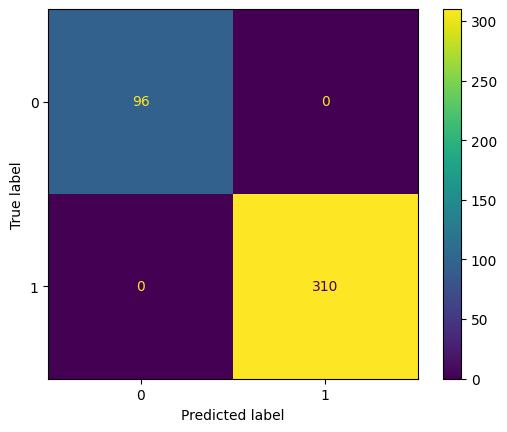

layers = 9

[NN] score range: 0.09010887891054153 → 0.9470236301422119

[NN] th=0.8574 | AUC=0.994 P=0.993 R=0.974 F1=0.984
Confusion:
 [[ 94   2]
 [  8 302]]


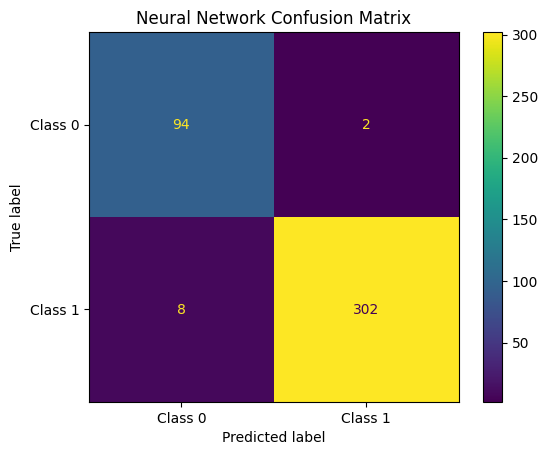


[NN | top-k] k=310 | P=0.977 R=0.977 F1=0.977
Confusion:
 [[ 89   7]
 [  7 303]]


In [25]:
# ==== CELL 2: MODELS + THRESHOLD TUNING ====
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_classification
import os, random, numpy as np
os.environ["PYTHONHASHSEED"]="0"; random.seed(42); np.random.seed(42)

from sklearn.metrics import (
    roc_auc_score, precision_recall_curve, precision_score, recall_score, f1_score,
    confusion_matrix
)

def best_f1_threshold(y_true, y_score):
    prec, rec, th = precision_recall_curve(y_true, y_score)
    f1s = 2*prec*rec/(prec+rec + 1e-12)
    i = int(np.nanargmax(f1s))
    return (th[i] if i < len(th) else 0.5), float(f1s[i])

def eval_at(name, y_true, y_score, th):
    y_pred = (y_score >= th).astype(int)
    print(f"\n[{name}] th={th:.4f} | AUC={roc_auc_score(y_true,y_score):.3f} "
          f"P={precision_score(y_true,y_pred,zero_division=0):.3f} "
          f"R={recall_score(y_true,y_pred,zero_division=0):.3f} "
          f"F1={f1_score(y_true,y_pred,zero_division=0):.3f}")
    print("Confusion:\n", confusion_matrix(y_true,y_pred))

# ---------------- A) Random Forest baseline ----------------
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("rf", RandomForestClassifier(
        n_estimators=600, random_state=42, class_weight="balanced", n_jobs=-1
    ))
]).fit(X_train, y_train)

y_rf = rf.predict_proba(X_test)[:,1]
print("[RF] score range:", float(y_rf.min()), "→", float(y_rf.max()))
th_rf, f1_rf = best_f1_threshold(y_test, y_rf)
eval_at("RF", y_test, y_rf, th_rf)
if 'y_test' in globals():
    y_true_cm = y_test
elif 'y_true' in globals():
    y_true_cm = y_true
else:
    raise NameError("Couldn't find true labels. Make sure y_test (or y_true) exists before running this cell.")
y_pred=rf.predict(X_test)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true_cm, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()
plt.show()
# ---------------- B) Neural net (class-weighted) ----------------
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

prep_nn = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
X_train_p = prep_nn.fit_transform(X_train)
X_test_p  = prep_nn.transform(X_test)

p = float(y_train.mean())
w0, w1 = 0.5/(1-p+1e-12), 0.5/(p+1e-12)

keras.utils.set_random_seed(42)
nn = keras.Sequential([
    layers.Input(shape=(X_train_p.shape[1],)),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])
nn.compile(optimizer=keras.optimizers.Adam(1e-3), loss='binary_crossentropy')
num_layers = len(nn.layers)
print("layers = " + str(num_layers))
cb = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)]
nn.fit(X_train_p, y_train, epochs=200, batch_size=128, verbose=0,
       validation_split=0.2, class_weight={0:w0, 1:w1}, callbacks=cb)

y_nn = nn.predict(X_test_p, verbose=0).ravel()
print("\n[NN] score range:", float(y_nn.min()), "→", float(y_nn.max()))
th_nn, f1_nn = best_f1_threshold(y_test, y_nn)
eval_at("NN", y_test, y_nn, th_nn)
if 'y_test' in globals():
    y_true_nn = y_test
elif 'y_true' in globals():
    y_true_nn = y_true
else:
    raise NameError("Couldn't find true labels. Make sure y_test (or y_true) exists before running this cell.")

# Convert probability predictions to binary labels using tuned threshold
y_pred_nn = (nn.predict(X_test_p, verbose=0).ravel() >= th_nn).astype(int)

# Compute and display confusion matrix (no .classes_ attribute for NN)
cm_nn = confusion_matrix(y_true_nn, y_pred_nn, labels=[0, 1])
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn,
                                 display_labels=['Class 0', 'Class 1'])
disp_nn.plot()
plt.title("Neural Network Confusion Matrix")
plt.show()



# -------------- Optional: top-k rule (match prevalence) --------------
m = int(round(y_test.mean() * len(y_test)))
idx = np.argsort(y_nn)[::-1]
y_topk = np.zeros_like(y_test, dtype=int)
if m > 0: y_topk[idx[:m]] = 1
print(f"\n[NN | top-k] k={m} | "
      f"P={precision_score(y_test,y_topk,zero_division=0):.3f} "
      f"R={recall_score(y_test,y_topk,zero_division=0):.3f} "
      f"F1={f1_score(y_test,y_topk,zero_division=0):.3f}")
print("Confusion:\n", confusion_matrix(y_test, y_topk))

Using features: ['pl_orbper', 'st_teff', 'st_rad', 'st_mass', 'sy_dist', 'sy_vmag']
Train/Test sizes: 27913 6979
Train prevalence: 0.264643714398309  Test prevalence: 0.2646510961455796

[RF-no-mass/radius] AUC = 0.950, score range 0.000→1.000
Best threshold: 0.310
Precision: 0.7949622166246851
Recall   : 0.8543584190579318
F1       : 0.8235908141962421
Confusion:
 [[4725  407]
 [ 269 1578]]


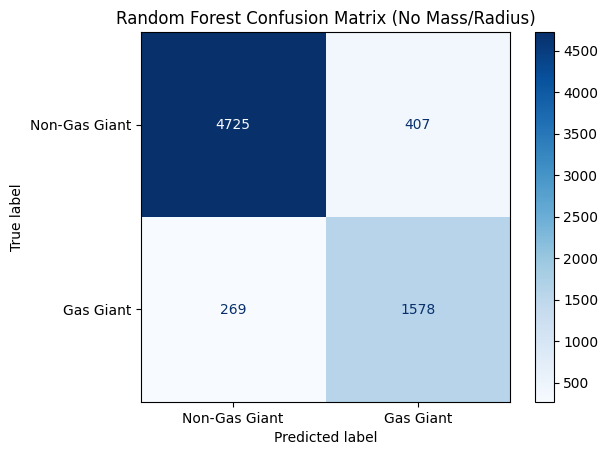


[NN-no-mass/radius] AUC = 0.752, score range 0.116→1.000
Best threshold: 0.509
Precision: 0.4628637059724349
Recall   : 0.654574986464537
F1       : 0.5422740524781341
Confusion:
 [[3729 1403]
 [ 638 1209]]


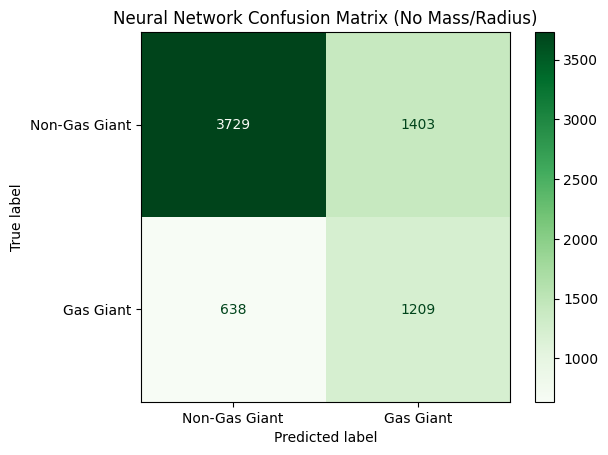

In [29]:
# ==== CELL: TEST WITHOUT MASS/RADIUS ====

# Step 1: Select features that are *not* part of the label definition
cand_feats = [c for c in df.columns if c not in ['gas_giant', 'pl_bmasse', 'pl_rade']]
# keep only physically meaningful numeric ones
keep = ['pl_orbper', 'st_teff', 'st_rad', 'st_mass', 'st_metfe', 'sy_dist', 'sy_vmag']
keep = [c for c in keep if c in cand_feats]

print("Using features:", keep)

X2 = df[keep].copy()
y2 = df['gas_giant'].astype(int)

# Step 2: Handle NaNs and split
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42, stratify=y2
)
print("Train/Test sizes:", len(X2_train), len(X2_test))
print("Train prevalence:", float(y2_train.mean()), " Test prevalence:", float(y2_test.mean()))

# Step 3: Random Forest baseline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    roc_auc_score, precision_recall_curve, precision_score,
    recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import numpy as np

rf2 = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("rf", RandomForestClassifier(
        n_estimators=600, random_state=42, class_weight="balanced", n_jobs=-1
    ))
]).fit(X2_train, y2_train)

y2_rf = rf2.predict_proba(X2_test)[:, 1]
auc2 = roc_auc_score(y2_test, y2_rf)
print(f"\n[RF-no-mass/radius] AUC = {auc2:.3f}, score range {y2_rf.min():.3f}→{y2_rf.max():.3f}")

# Find best F1 threshold
prec, rec, th = precision_recall_curve(y2_test, y2_rf)
f1s = 2 * prec * rec / (prec + rec + 1e-12)
best_i = int(np.nanargmax(f1s))
best_th = th[best_i] if best_i < len(th) else 0.5
y2_pred = (y2_rf >= best_th).astype(int)

print(f"Best threshold: {best_th:.3f}")
print("Precision:", precision_score(y2_test, y2_pred, zero_division=0))
print("Recall   :", recall_score(y2_test, y2_pred, zero_division=0))
print("F1       :", f1_score(y2_test, y2_pred, zero_division=0))
cm_rf = confusion_matrix(y2_test, y2_pred)
print("Confusion:\n", cm_rf)

# Plot confusion matrix for Random Forest
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Non-Gas Giant", "Gas Giant"])
disp_rf.plot(cmap="Blues")
plt.title("Random Forest Confusion Matrix (No Mass/Radius)")
plt.show()

# Step 4: Neural Net test
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

prep2 = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sc", StandardScaler())
])
X2_train_p = prep2.fit_transform(X2_train)
X2_test_p = prep2.transform(X2_test)

p = float(y2_train.mean())
w0, w1 = 0.5 / (1 - p + 1e-12), 0.5 / (p + 1e-12)

keras.utils.set_random_seed(42)
nn2 = keras.Sequential([
    layers.Input(shape=(X2_train_p.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])
nn2.compile(optimizer=keras.optimizers.Adam(1e-3), loss='binary_crossentropy')
cb = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)]
nn2.fit(X2_train_p, y2_train, epochs=200, batch_size=128, verbose=0,
        validation_split=0.2, class_weight={0: w0, 1: w1}, callbacks=cb)

y2_nn = nn2.predict(X2_test_p, verbose=0).ravel()
auc2_nn = roc_auc_score(y2_test, y2_nn)
print(f"\n[NN-no-mass/radius] AUC = {auc2_nn:.3f}, score range {y2_nn.min():.3f}→{y2_nn.max():.3f}")

prec, rec, th = precision_recall_curve(y2_test, y2_nn)
f1s = 2 * prec * rec / (prec + rec + 1e-12)
best_i = int(np.nanargmax(f1s))
best_th = th[best_i] if best_i < len(th) else 0.5
y2_pred_nn = (y2_nn >= best_th).astype(int)

print(f"Best threshold: {best_th:.3f}")
print("Precision:", precision_score(y2_test, y2_pred_nn, zero_division=0))
print("Recall   :", recall_score(y2_test, y2_pred_nn, zero_division=0))
print("F1       :", f1_score(y2_test, y2_pred_nn, zero_division=0))
cm_nn = confusion_matrix(y2_test, y2_pred_nn)
print("Confusion:\n", cm_nn)

# Plot confusion matrix for Neural Network
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=["Non-Gas Giant", "Gas Giant"])
disp_nn.plot(cmap="Greens")
plt.title("Neural Network Confusion Matrix (No Mass/Radius)")
plt.show()
